In [8]:
%pylab --no-import-all
%matplotlib inline
from sacla import *

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [9]:
import idi.reconstruction as recon

In [10]:
l=log('2019 SACLA - Shotlog.csv')

In [11]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [12]:
l.iloc[65:,:14]

,Run start,last run,Starttime,Endtime,Sample,E_ph,Pre Comment,Pulse Energy,Detector Filter,Beamline filter,Post Comment,Single,Dual,Sx min
,#,#,Time,Time,#/desc,keV,desc,uJ,desc,mm Silicon,desc,Photons,Photons,pulses
65,782314,782316.0,21:56:27,22:04:28,NP 20nm,7.2,dual is not working,465.0,50um Zink,0.1,stopped scan when beam down. Getting the dual ...,3500.0,5000.0,-10700.0
66,782317,782317.0,22:07:23,22:09:28,NP 20nm,7.2,continue the last scan,465.0,50um Zink,0.1,stopped scan because Mn filter in front of dua...,3500.0,5000.0,-10700.0
67,782318,782321.0,22:23:31,22:34:54,"#40, 10.1",7.2,filter in front of dual still,465.0,50um Zink,0.1,NaN,5000.0,2000.0,-10700.0
68,782318,782321.0,22:23:31,22:34:54,"#40, 10.1",7.2,changing attn during run,465.0,50um Zink,0.2,NaN,500.0,250.0,-10700.0
69,782318,782321.0,22:23:31,22:34:54,"#40, 10.1",7.2,"starting from 782321, all Si 0.1mm att",465.0,50um Zink,0.3,NaN,73.0,30.0,-10700.0
70,782318,782321.0,22:23:31,22:34:54,"#40, 10.1",7.2,rotating dual filter,465.0,50um Zink,0.3,didnt work,73.0,30.0,-10700.0
71,782322,782329.0,22:47:27,23:07:31,same as above,7.2,NaN,465.0,50um Zink,0.1,NaN,73.0,30.0,-10700.0
72,782330,782354.0,23:28:54,00:37:14,"50, 20nm high",7.2,important sample,465.0,50um Zink,0.1,NaN,50000.0,5000.0,-10700.0
73,782355,782356.0,00:38:15,00:43:50,"50, 20nm high",7.2,continuing the scan above,465.0,50um Zink,0.1,NaN,50000.0,5000.0,-10700.0


In [13]:
#to run: 97, 82, 83, 84, 87, 88, 93, 94
samples=[
      '10 mid',
      'Fe Foil',
     '51, 10 high',
     '10 agar',
     '10 low',
   '5 mid',
   '20 mid',
#    '5 high',
#    '20nm high',
 
]

In [20]:
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    print(sample, end=': ')
    runs.apply(lambda r: print(r.name),axis=1)

10 mid: 87
Fe Foil: 79
80
81
51, 10 high: 82
10 agar: 97
10 low: 93
5 mid: 89
20 mid: 91


In [14]:
import glob
import os
def getlatest(search_dir=".",pattern='*',n=1):
    files = list(filter(os.path.isfile, glob.glob(search_dir +'/'+ pattern)))
    files = sorted(files,key=os.path.getmtime,reverse=True)[:n]
    if len(files)==1: return files[0]
    if len(files)==0: return None
    else: return tuple(files)

In [15]:
def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)

In [17]:
#merge runs

import gc
results={}

def append(dictionary,key,value):
    if not key in dictionary:
        dictionary[key]=[]
    dictionary[key].append(value)
def submit(r):
    if 'skip' in r['Run start'][0]: return
    runstart=int((r['Run start'][0]))
    runend=int(r['last run'][0])
    if (runend-runstart)<=2: 
        print('skip',r.name)
        return
    run=str(r.name)
    allres=dict()
    for cr in range(runstart,runend+1):
        filename=getlatest('/work/gorkhover/zimmf/np/',f'{run}-{cr}-*',n=1)

        if filename is None: 
            print(r.name,cr,filename,'not found')
            continue
        print(r.name,cr,filename)
        try:
            file=np.load(filename)
            for k,v in file.items():
                if '3d' in k: continue #dont do it fore large 3d result..
                print(k,end=' ')
                append(allres,k,v)
        except:
            print(f'error in {filename}')
        gc.collect()
    allres={k:np.array(v) for k,v in allres.items()}
    np.savez_compressed(f'/work/gorkhover/zimmf/np/{run}_merged.npz',**allres)
    print(run,'saved')
for sample in samples:
    runs=l.search('Sample',sample)
    isatt=np.array(runs['Beamline filter']!='0')
    runs=runs[isatt]
    runs.apply(submit,axis=1)

87 782424 /work/gorkhover/zimmf/np/87-782424-191118-063531.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthreshold pixelsize maximg normalize allimg allrad delete workfile outfile mask meanphotons stdphotons maxphotons nphotonsmax nphotonsmin photonsum bg mindist shotmean shotstd Nimg simplerad_all directrad_all simple_mean direct_mean directrad_mean simple_std direct_std directrad_std 87 782425 /work/gorkhover/zimmf/np/87-782425-191118-063529.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthreshold pixelsize maximg normalize allimg allrad delete workfile outfile mask meanphotons stdphotons maxphotons nphotonsmax nphotonsmin photonsum bg mindist shotmean shotstd Nimg simplerad_all directrad_all simple_mean direct_mean directrad_mean simple_std direct_std directrad_std 87 782426 /work/gorkhover/zimmf/np/87-782426-191118-063529.npz
inputfile outpath workpath run simple direct directrad detector energy z photonsthr

In [18]:
!ls /work/gorkhover/zimmf/np/??_merged*


/work/gorkhover/zimmf/np/79_merged.npz	/work/gorkhover/zimmf/np/89_merged.npz
/work/gorkhover/zimmf/np/80_merged.npz	/work/gorkhover/zimmf/np/91_merged.npz
/work/gorkhover/zimmf/np/82_merged.npz	/work/gorkhover/zimmf/np/93_merged.npz
/work/gorkhover/zimmf/np/87_merged.npz	/work/gorkhover/zimmf/np/97_merged.npz


In [21]:
merged=np.load('/work/gorkhover/zimmf/np/80_merged.npz',allow_pickle=True)

In [22]:
list(merged.keys())

['inputfile',
 'outpath',
 'workpath',
 'run',
 'simple',
 'direct',
 'directrad',
 'detector',
 'energy',
 'z',
 'photonsthreshold',
 'pixelsize',
 'maximg',
 'normalize',
 'allimg',
 'allrad',
 'delete',
 'workfile',
 'outfile',
 'mask',
 'meanphotons',
 'stdphotons',
 'maxphotons',
 'nphotonsmax',
 'nphotonsmin',
 'photonsum',
 'bg',
 'mindist',
 'shotmean',
 'shotstd',
 'Nimg',
 'simplerad_all',
 'directrad_all',
 'simple_mean',
 'direct_mean',
 'directrad_mean',
 'simple_std',
 'direct_std',
 'directrad_std']

In [16]:
merged0=np.load('/work/gorkhover/zimmf2/newmask/80_merged2.npz',allow_pickle=True)
mask0=merged0['mask'][2,...]
import idi.reconstruction as recon
import idi.util as util
simplenorm0=recon.simple.corr(mask0)
simplemean0=merged0['simple_mean'][2,...]

In [17]:
t=(simplemean0/simplenorm0)

/home/gorkhover/anaconda3/envs/zimmf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


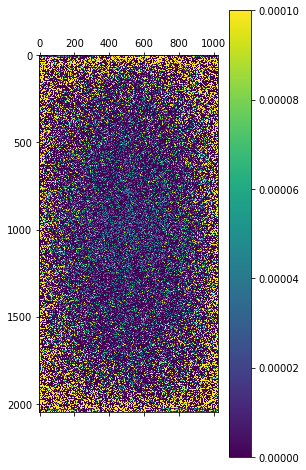

In [18]:
plt.matshow(t,vmin=0,vmax=0.0001)
plt.colorbar()

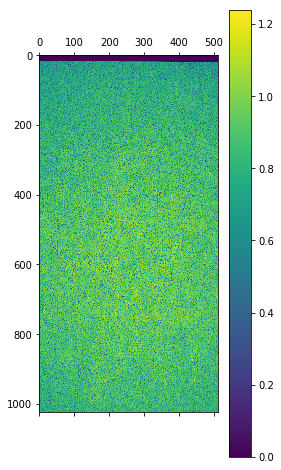

In [48]:
c=merged0['meanphotons'][2]
plt.matshow(c)
plt.colorbar()

(-0.0002, 0.0001)

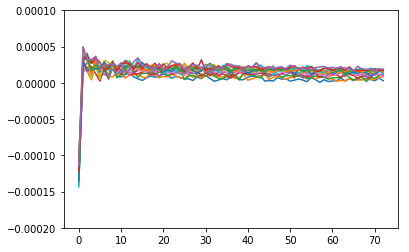

In [63]:

merged0=np.load('/work/gorkhover/zimmf2/newmask/80_merged2.npz',allow_pickle=True)
dm0=merged0['directrad_mean']
mask0=merged0['mask'][0,...]
import idi.reconstruction as recon
f=recon.newrad.corrfunction(mask0.shape,0.1/50e-6,75)
norm0=f(mask0)
r0=dm0/norm0[None,:]
#r0=r0/(r0[2]) #normalisation
plt.plot(r0[:,2:].T)
plt.ylim([-0.0002,0.0001])

(-0.015, 0.015)

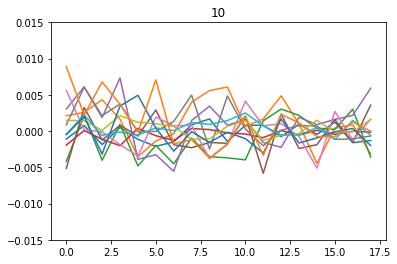

In [79]:
import idi.reconstruction as recon


merged10=np.load('/work/gorkhover/zimmf2/newmask/87_merged2.npz',allow_pickle=True)
dm10=merged10['directrad_mean']
mask10=merged10['mask'][0,...]
f=recon.newrad.corrfunction(mask10.shape,0.1/50e-6,75)
norm10=f(mask10)
r10=dm10/norm10[None,:]
#r10=r10/(r10[2]) #normalisation
plt.plot(r10[9:,2:20].T)
#plt.plot(np.mean(r10[:,1:],axis=0))
plt.title('10')
plt.ylim([-0.015,0.015])

(-0.01, 0.01)

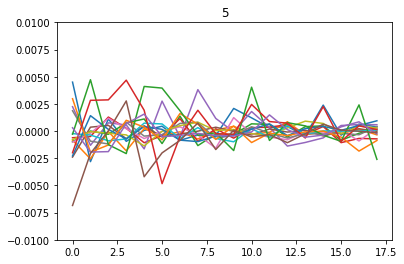

In [74]:
merged5=np.load('/work/gorkhover/zimmf2/newmask/89_merged2.npz',allow_pickle=True)
dm5=merged5['directrad_mean']
mask5=merged5['mask'][0,...]
f=recon.newrad.corrfunction(mask5.shape,0.1/50e-6,75)
norm5=f(mask5)
r5=dm5/norm5[None,:]
#r10=r10/(r10[2]) #normalisation
plt.plot(r5[3:-1,2:20].T)
#plt.plot(np.mean(r5[:,1:],axis=0))
plt.title('5')
plt.ylim([-0.01,0.01])

0.06325081126681185

(-0.01, 0.01)

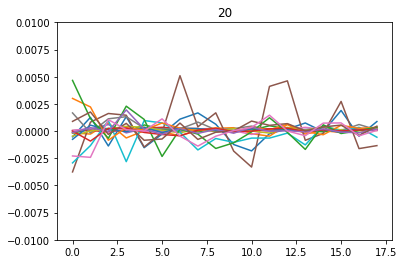

In [73]:
merged20=np.load('/work/gorkhover/zimmf2/newmask/91_merged2.npz',allow_pickle=True)
dm20=merged20['directrad_mean']
mask20=merged20['mask'][0,...]
f=recon.newrad.corrfunction(mask20.shape,0.1/50e-6,75)
norm20=f(mask20)
r20=dm20/norm20[None,:]
#r10=r10/(r10[2]) #normalisation
plt.plot(r20[3:-1,2:20].T)
#plt.plot(np.mean(r20[:,1:],axis=0))
plt.title('20')
plt.ylim([-0.01,0.01])